Exercise 3.12 6 and 3.12 30

6:
Describe the class of strings matched by the following regular expressions.

[a-zA-Z]+   
  Means any letter (lower or upper case) with 1 or more repetitions. so aBwasaSwA would be accepted.   

[A-Z][a-z]*
    One upper case letter followed by any amount of lower case.so A is accepted and All is accepted, but AaA is not.

p[aeiou]{,2}t
    This means that a word should start with "p" then one of the letters "aeiou" between 0 and 2 times and then t. 
    So pet is accepted and pt is accepted etc.


\d+(\.\d+)?
    \d is short for [0-9] and \. is just a "." therefor this accepts any digits between 0-9 1 or more times, then a dot and 0-9 repeated 1 or more times however the ? means 0 or 1 of the previous signs (the thing in the capture) so it accepts Just 9 or 99 or 925 or 9.912 etc.

([^aeiou][aeiou][^aeiou])*
    The ^ inside the brackets means all other letters than these, so this would accept bab for example or babbab
    But it would not accept aab since the first letter must not be a.

\w+|[^\w\s]+
        \w means [a-zA-Z0-9] so all leters and numbers. im guessing the next part means all other letters than those in \w and           \s is whitespaces and newlines so not those either.
        Therefore aW9. would be accepted but AW9a would not since the plus means 1 or more things which is not a letter/ number/         whitespace.
            

In [6]:
#Use stemmers:
import nltk
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

text = "This is a test which the stemmers should be used upon, it tests the programs and figures out what to do. There are a figure in the book which describes it"
tokens = nltk.word_tokenize(text)
[porter.stem(t) for t in tokens]

[u'thi',
 'is',
 'a',
 'test',
 'which',
 'the',
 u'stemmer',
 'should',
 'be',
 u'use',
 'upon',
 ',',
 'it',
 u'test',
 'the',
 u'program',
 'and',
 u'figur',
 'out',
 'what',
 'to',
 'do',
 '.',
 'there',
 'are',
 'a',
 u'figur',
 'in',
 'the',
 'book',
 'which',
 u'describ',
 'it']

In [7]:
[lancaster.stem(t) for t in tokens]

['thi',
 'is',
 'a',
 'test',
 'which',
 'the',
 'stem',
 'should',
 'be',
 'us',
 'upon',
 ',',
 'it',
 'test',
 'the',
 'program',
 'and',
 'fig',
 'out',
 'what',
 'to',
 'do',
 '.',
 'ther',
 'ar',
 'a',
 'fig',
 'in',
 'the',
 'book',
 'which',
 'describ',
 'it']

I can be seen that even with this small text they are different, the porter stemmer has alot of unicode, the lancaster does not.

In [2]:
#Download all the wiki pages, with the new "content" format.

import urllib2
import json
import pandas as pd
import json

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=extracts&exlimit=max&explaintext"
rvprop ="rvprop=timestamp|content"
dataformat = "format=json"
rvdir = "rvdir=older" #sort revisions from newest to oldest
start = "rvend=2016-01-03T00:00:00Z" #start of my time period
end = "rvstart=2020-01-03T00:00:00Z" #end of my time period
limit = "rvlimit=1" #consider only the first revision
wikiresponse = {}

df3 = pd.read_csv('H115.csv')
df3['congress_number'] =115

file = open('Republican.txt', 'w')
file.write("") 
file.close()


file = open('Democratic.txt', 'w')
file.write("") 
file.close()

members = df3['WikiPageName'].unique()
for member in members:
    title = "titles=" + member
    query = "%s%s&%s&%s&%s&%s&%s&%s&%s&%s" % (baseurl, action, title, content, rvprop, dataformat, rvdir, end, start, limit)
    wikisource = urllib2.urlopen(query)
    Temp = df3.loc[df3['WikiPageName'] == member]
    
    w = wikisource.read()

    wikiJSON = json.loads(w)

    
    counter = Temp['Party'].str.contains('Republican').sum()
    if counter > 0:
        file = open('Republican.txt', 'a+')
        file.write(str(wikiJSON['query'])) 
        file.close()
    
    counter = Temp['Party'].str.contains('Democratic').sum()
    if counter > 0:
        file = open('Democratic.txt', 'a+')
        file.write(str(wikiJSON['query'])) 
        file.close()




In [28]:
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
import re
import nltk
import numpy as np



lancaster = nltk.LancasterStemmer()

tokenizer = RegexpTokenizer(r'\w+')

file = open('Republican.txt', 'r')
text = file.read()
text = re.sub(r'\d+', '', text)
text = text.lower()

members2 = members

for i in range (0, len(members2)):
    members2[i] = members2[i].lower()

for member in members:
    split = member.split("_")
    for i in range(0,2):
        members2 = np.append(members2, split[i].lower())
                                                        
filtered_Republican = tokenizer.tokenize(text)

members2 = np.append(members2, 'n')
members2 = np.append(members2, 'u')

stopwordslist = set(stopwords.words('english'))
members2 = set(members2)

filtered_Republican = [w for w in filtered_Republican if w not in stopwordslist and w not in members2]

filtered_Republican

['normalized',
 'pages',
 'extract',
 'edwin',
 'born',
 'june',
 'american',
 'politician',
 'serving',
 'representative',
 'alaska',
 'large',
 'congressional',
 'district',
 'since',
 'member',
 'republican',
 'party',
 'longest',
 'serving',
 'member',
 'united',
 'states',
 'house',
 'representatives',
 'state',
 'alaska',
 'longest',
 'currently',
 'serving',
 'house',
 'member',
 'became',
 'dean',
 'house',
 'representatives',
 'december',
 'resignation',
 'michigan',
 'first',
 'republican',
 'years',
 'since',
 'gilbert',
 'haugen',
 'iowa',
 'become',
 'dean',
 'house',
 'well',
 'first',
 'alaska',
 'last',
 'remaining',
 'member',
 'congress',
 'office',
 'since',
 'nixon',
 'administration',
 'early',
 'life',
 'education',
 'pre',
 'political',
 'career',
 'nyoung',
 'born',
 'meridian',
 'sutter',
 'county',
 'california',
 'earned',
 'associate',
 'degree',
 'education',
 'yuba',
 'college',
 'bachelor',
 'degree',
 'chico',
 'state',
 'college',
 'served',
 'army',
 '

In [29]:
file = open('Democratic.txt', 'r')
text = file.read()
text = re.sub(r'\d+', '', text)
text = text.lower()

filtered_Democratic = tokenizer.tokenize(text)

filtered_Democratic = [w for w in filtered_Democratic if w not in stopwordslist and w not in members2]

filtered_Democratic

['normalized',
 'pages',
 'extract',
 'jr',
 'born',
 'may',
 'retired',
 'american',
 'politician',
 'democratic',
 'party',
 'served',
 'representative',
 'michigan',
 'districts',
 'represented',
 'always',
 'included',
 'part',
 'western',
 'detroit',
 'final',
 'three',
 'terms',
 'included',
 'many',
 'detroit',
 'western',
 'suburbs',
 'well',
 'large',
 'portion',
 'downriver',
 'area',
 'nconyers',
 'served',
 'years',
 'congress',
 'becoming',
 'sixth',
 'longest',
 'serving',
 'member',
 'congress',
 'history',
 'also',
 'longest',
 'serving',
 'african',
 'american',
 'member',
 'congress',
 'ever',
 'also',
 'dean',
 'house',
 'representatives',
 'end',
 'term',
 'last',
 'remaining',
 'member',
 'congress',
 'served',
 'since',
 'presidency',
 'lyndon',
 'b',
 'nafter',
 'serving',
 'korean',
 'war',
 'became',
 'active',
 'civil',
 'rights',
 'movement',
 'also',
 'served',
 'aide',
 'congressman',
 'winning',
 'election',
 'house',
 'co',
 'founded',
 'congressional',
 

In [34]:
print(len(filtered_Republican))
print(len(filtered_Democratic))

253867
201952


In [40]:
from collections import Counter

count = Counter(filtered_Republican)
print count.most_common(5)

count2 = Counter(filtered_Democratic)
print count2.most_common(5)

[('house', 2496), ('republican', 2106), ('election', 1955), ('district', 1757), ('congress', 1669)]
[('house', 1876), ('district', 1589), ('election', 1520), ('congress', 1505), ('democratic', 1332)]
253867


In [50]:
republicanTF =  Counter({k:float(v)/float(len(filtered_Republican)) for k,v in count.items()})
democraticTF =  Counter({k:float(v)/float(len(filtered_Democratic)) for k,v in count2.items()})   

In [51]:
print republicanTF.most_common(5)
print democraticTF.most_common(5)

[('house', 0.009831919863550599), ('republican', 0.008295682384870818), ('election', 0.007700882745689672), ('district', 0.0069209467949753216), ('congress', 0.006574308594657833)]
[('house', 0.009289336079860561), ('district', 0.007868206306449058), ('election', 0.007526540960228173), ('congress', 0.007452265884962763), ('democratic', 0.006595626683568372)]


In [72]:
republicanIDF = Counter()
democraticIDF = Counter()
republicanTFIDF = Counter()
democraticTFIDF = Counter()

import math

for keys in count:
    c = 1
    if keys in count2.keys():
        c = 2        
    republicanIDF[keys] = (math.log(float(2)/float(c)))
    republicanTFIDF[keys] = republicanTF[keys]*republicanIDF[keys]

for keys in count2:
    c = 1
    if keys in count.keys():
        c = 2        
    democraticIDF[keys] = (math.log(float(2)/float(c)))
    democraticTFIDF[keys] = democraticTF[keys]*democraticIDF[keys]

In [66]:
print republicanTFIDF.most_common(10)
print democraticTFIDF.most_common(10)

[('nrepublican', 0.00036040693683666165), ('ahca', 0.00018839453516461858), ('xedaz', 0.0001501695570152757), ('montana', 0.000139248134686892), ('nking', 8.737137862706949e-05)]
[('xerrez', 0.00035352043850852855), ('guti', 0.00032263030310487076), ('kuster', 0.00018877304968902011), ('xenchez', 0.0001578829142853623), ('xezquez', 0.0001510184397512161)]


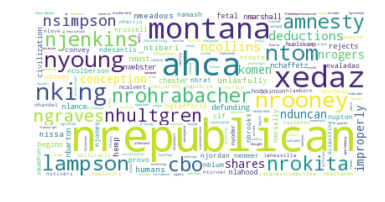

In [91]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=republicanTFIDF)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

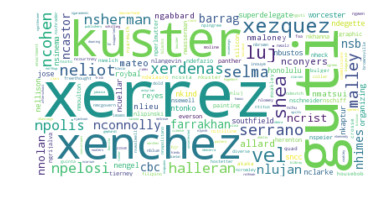

In [92]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=democraticTFIDF)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()